**Question 1**

**What is the key difference between ideas that can, and cannot be examined and tested statistically? What would you describe are the key "criteria" defining what a good null hypothesis is? And what is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing?**

The key factor that determines whether an idea can be tested statistically is quantifiability. If the idea can be expressed in terms of measurable, observable variables on which data can be collected in a repeatable and reliable way, then statistical testing will be possible. On the other hand, ideas which are expressed with an element of subjectivity or a lack of clarity cannot be examined statistically. 

A good null hypothesis should be testable. To this end, the null hypothesis needs to be a clear and precise statement about which data can be collected reliably to determine whether the null hypothesis should be rejected or not.

The null hypothesis is the statement being tested, usually suggesting that there is no effect or no relationship between variables. It serves as the default assumption, and statistical tests aim to assess whether there is enough evidence to reject this assumption. The alternative hypothesis represents the opposite claim to the null hypothesis. It proposes that there is an effect, a difference, or a relationship. If sufficient evidence is found against the null hypothesis, the alternative hypothesis is supported.

**Question 2**

When we perform statistical tests, our objective is to make conclusions about the whole population, or the entire group of events or items of interest to us, rather than just the small group of empirical data we collected, which is called the sample. These conclusions revolve around population parameters, which are measurable aspects which summarise or describe the population of interest. For instance, if we are testing for the population mean, we should come up with an initial guess about what the population mean could be, since the population mean is a number whose actual value we do not know. We call this guess the null hypothesis, and we are looking to see whether the actual observed data we collected indicates that our guess was not right. For that matter, we establish an alternative hypothesis which states that our guess does not equal the true population mean. These hypotheses form the basis for the test. 

Once we obtain a sample, we can take all the individual observed values we collected and calculate their average, giving us the sample mean. This sample mean is known as a sample statistic (an aspect of the sample which can be measured and calculated), which is what we ultimately use to make inferences about the plausibility of the null hypothesis. The conclusion of the test is therefore about the population, rather than the sample.

**Question 3**

The p-value, by definition, is the probability that a statistic is as or more extreme than the observed statistic if the null hypothesis is true. In other words, we are looking to see how unlikely certain events would be to occur under 'normal' circumstances, where the effect or difference we are testing for does not exist. We do this through simulation and obtaining a sampling distribution of the test statistic assuming the null hypothesis is true.

**Question 4**

The null hypothesis is our initial guess about what the value of a population parameter (a measurable aspect of the population) could be. A small p-value indicates that the odds of seeing the observed test statistic, or the quantity derived from the data we actually observed through a sample, are very low under circumstances where the null hypothesis is true. In other words, the smaller the p-value, the more our guess made in the null hypothesis is harder to believe since the observed data would be so unusual that it would be less and less reasonable to claim that the observed data just happened by chance if our initial guess about the population parameter was indeed correct. 

The calculation of the p-value can be done by generating a sampling distribution of the test statistic (the quantity we are measuring to describe a sample) assuming the null hypothesis is true. The sampling distribution shows the frequency with which different values for the test statistic would be obtained by hypothetically taking independent random samples (of the same size as the original empirical sample) from the population, assuming our initial guess about the population parameter was correct. We then compare these with the actual test statistic we got from the original sample and use the sampling distribution to see how likely it would be get a value for the test statistic as or more extreme than the one we got from the sample. If it is highly unlikely to get such a test statistic, as with a small p-value, then our null hypothesis becomes less credible.

**Question 5**

In [44]:
import numpy as np

# Set up parameters
n_couples = 124   # total number of couples
observed_right_tilts = 80  # observed number of right tilts
p_right = 0.5  # probability of tilting right under the null hypothesis
n_simulations = 10000  # number of simulations
np.random.seed(130)
# Run the simulation: flipping a coin 124 times and counting the number of "right" tilts
simulated_tilts = np.random.binomial(n=n_couples, p=p_right, size=n_simulations)

# Calculate the proportion of simulations where the number of right tilts is as extreme as the observed value
extreme_count = np.sum((simulated_tilts >= observed_right_tilts) | 
                       (simulated_tilts <= n_couples - observed_right_tilts))

# Calculate the p-value for a two-tailed test
p_value_two_tailed = extreme_count / n_simulations

print(f"Two-tailed P-value: {p_value_two_tailed}")

Two-tailed P-value: 0.0021


0.001 < p < 0.01, therefore there is strong evidence against H0.

**Question 6**

**Can a smaller p-value definitively prove that the null hypothesis is false? Is it possible to definitively prove that Fido (from the "second pre-lecture video") is innocent using a p-value? Is it possible to definitively prove that Fido is guilty using a p-value? How low or high does a p-value have to be to definitely prove one or the other?**

A p-value cannot definitively prove that the null hypothesis is false. A smaller p-value suggests that the observed data is unlikely under the null hypothesis. However, this does not prove that the null hypothesis is false. It merely indicates that, given the data, the null hypothesis is less probable, and we may reject it based on a pre-set significance level.

A p-value alone cannot definitively prove Fido is innocent. If the p-value is large, it indicates weak evidence against the null hypothesis, meaning we do not have enough evidence to reject it. This, however, does not "prove" innocence; it simply means we lack strong evidence of guilt. It is possible that we conclude Fido to not be guilty when in fact he indeed was guilty, resulting in a Type II error. Similarly, a low p-value does not prove guilt. A p-value below 0.01 suggests strong evidence against the null hypothesis, but it is still possible that the null hypothesis could be true, and the low p-value occurred by chance, in which case a Type I error is made.

**Question 7**

In [5]:
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})
patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore
patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


In [48]:
observed_statistic = (patient_data.HealthScoreChange > 0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

# For a one-sided test (right-tailed), we only care about values greater than or equal to the observed statistic
SimStats_as_or_more_extreme_than_ObsStat = simulated_statistics >= observed_statistic

# Calculate the p-value
p_value = (SimStats_as_or_more_extreme_than_ObsStat).sum() / number_of_simulations

# Output the results
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under HO)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

Number of Simulations: 10000

Number of simulated statistics (under HO)
that are "as or more extreme" than the observed statistic: 561

p-value
(= simulations "as or more extreme" / total simulations): 0.0561


**Describe what changed in the code; how this changes the interpretation of the hypothesis test; and whether or not we should indeed expect the p-value to be smaller in the "one tailed" versus "two tailed" analysis.**

In the original two-tailed test, we checked for values as extreme as the observed statistic in both directions using _abs(simulated_statistics - population_parameter_value_under_H0) >= abs(observed_statistic - population_parameter_value_under_H0)_. This looked at deviations on both sides (left and right) of the hypothesized population parameter. In the one-tailed test, we now check only one direction (right-tailed in this case), comparing simulated_statistics >= observed_statistic. This means we are only interested in simulations where the result is as large or larger than the observed statistic, assuming the null hypothesis is true.

A two-tailed test is used when we want to check for deviations in either direction (i.e., the effect could be positive or negative). For example, "Is there a difference in any direction from the null hypothesis?" Changing to a one-tailed test means we are now only interested in deviations in one direction (e.g., we're only testing whether the statistic is greater than the hypothesized value). For example, "Is the health score improvement greater than expected?"

The p-value is expected to be smaller in a one-tailed test compared to a two-tailed test, assuming the observed effect is in the direction of interest. A two-tailed p-value is based on extreme results in both directions (both greater and less than the observed statistic). So, it includes more possible outcomes, making the p-value larger. A one-tailed p-value is based on extreme results in only one direction (either greater or less than the observed statistic, depending on the test). Since we are considering only one side, the probability mass is focused on one tail, leading to a smaller p-value.

**ChatBot session summary:**  

Key Criteria for a Good Null Hypothesis:
Summary: We discussed the importance of a good null hypothesis (H₀) being precise, testable, and aligned with the data being analyzed. It should assert no effect or no difference, providing a foundation for statistical testing.
2. Difference Between Null and Alternative Hypotheses:
Summary: The null hypothesis (H₀) claims no effect or difference, while the alternative hypothesis (H₁) suggests that there is an effect or difference. In hypothesis testing, we use the data to assess the likelihood that H₀ is true.
3. Population Parameter vs. Sample Statistic:
Summary: We clarified that statistical test outcomes refer to the population parameter (e.g., population mean, μ), not just the sample statistic (e.g., sample mean, x̄). Tests use the sample to infer properties about the population.
4. Logic Behind P-values:
Summary: The logic of p-values is to evaluate how likely the observed data is under the assumption that the null hypothesis is true. A small p-value suggests that the observed data is inconsistent with the null hypothesis, making H₀ seem less reasonable.
5. Simulating P-values Using a Coin-flipping Model:
Summary: We simulated a p-value for a study on head tilts when couples kiss. The null hypothesis assumed a 50/50 chance of tilting left or right. Using a binomial simulation with 10,000 trials, we computed a p-value of approximately 0.0008, suggesting strong evidence against the null hypothesis.
6. Adjusting the Simulation for One-tailed Hypothesis Tests:
Summary: You provided code for simulating p-values using a two-tailed test. We adjusted this for a one-tailed test, which checks only one direction of deviation (either greater or less). For a right-tailed test, we used:

python
Copy code
SimStats_as_or_more_extreme_than_ObsStat = simulated_statistics >= observed_statistic
The one-tailed test typically results in a smaller p-value compared to the two-tailed test because it focuses on a specific direction (e.g., testing for an increase rather than any deviation).

7. Differences Between One-tailed and Two-tailed Tests:
Summary: A two-tailed test looks for deviations in either direction (greater or less than expected), while a one-tailed test focuses only on one direction (e.g., only testing for an increase). One-tailed tests often result in smaller p-values if the effect is in the expected direction because they ignore the other side.
8. Python Code for One-tailed Hypothesis Test:
Summary: We provided Python code to compute p-values for both one-tailed and two-tailed tests. For the one-tailed test, the key was adjusting the comparison to only consider values in one direction of deviation (greater or equal for a right-tailed test).
9. Expectation of P-value:
Summary: For a one-tailed test, the p-value is expected to be smaller than that of a two-tailed test because it focuses on extreme results in just one direction, while the two-tailed test considers both directions.
This summary captures our discussions and adjustments, providing a complete record of our exploration into hypothesis testing, p-values, and simulations.

**ChatBot transcript log link:** https://chatgpt.com/share/670d2697-16d4-8012-8225-ccd22c2a5c28

**Question 8**

**_1. Problem Introduction_**

Fisher's experiment and the experiment with 80 STA130 students both aim to test whether the ability to identify the order of pouring (milk or tea first) is due to skill or chance. However, the population and sample being considered are different. In the case of the experiment with STA130 students, the population consists of all students currently enrolled in STA130 who could potentially taste tea and identify whether the milk or tea was poured first. The sample consists of the 80 STA130 students who participated in the experiment and were each given one cup of tea to taste. 

The population parameter of interest is the true proportion of all STA130 students who can correctly identify whether the tea or milk was poured first. The test statistic is the sample proportion 0.6125, which represents the proportion of correct responses from the sample of 80 students.

**Null and Alternative Hypotheses**

**H0 : p <= 0.5**

**H1 : H0 is false (p > 0.5)**

Under H0, we assume that when students taste tea, they have no special ability to tell whether the milk or tea was poured first. In other words, we think that their guesses are just random, and they would get it right about half the time, just like flipping a fair coin. On the other hand, under H1, we are considering the idea that the students might actually have a knack for knowing whether the milk or tea was poured first, and that they are getting it right more than half the time. If this is true, it suggests they are not just guessing like we assumed under H0.

**_2. Quantitative Analysis_**

**Methodology**

We will use simulation to generate a sampling distribution of sample proportions under the assumption of H0, and determine the percentage of sample proportions which are as or more extreme than the observed test statistic of 0.6125. Since this is a one-tailed test, we are looking for the percentage of sample proportions which are as large or larger than 0.6125. This will give us the p-value, which will be used to determine the strength of evidence against H0 using the table below. We will set a significance level of 0.05 (5%) for this test. 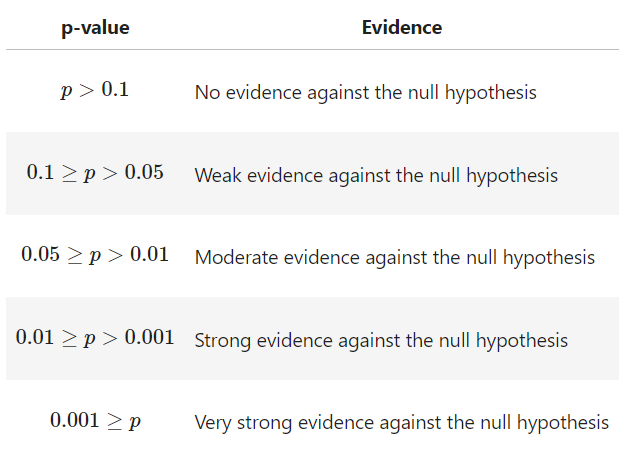

The basis for simulation will consist of assuming that students are only randomly guessing whether the milk or the tea came first (p = 0.5). Since there are only 2 possible outcomes (either a student gets it right or gets it wrong), we can use a binomial experiment similar to a coin-flipping model to generate a random sample proportion of students who answer correctly. This sample proportion needs to be based on a binomial experiment with 80 trials, equal to the size of our original sample. This is because we are looking to analyse the variability of the sample statistic with sample size 80 to provide inference regarding the population proportion it correspondingly estimates, and the strength of the evidence it provides depends on the variability of the sample statistic (which in turn depends on the sample size used to construct the statistic). Hence, our simulation also needs to be run with 80 trials to simulate this variability.

We will run this binomial experiment 10,000 times to obtain 10,000 simulated sample proportions under H0, giving us the sampling distribution of sample proportions under H0.

Observed Proportion: 0.6125
Number of sample proportions as large or larger than the observed proportion: 291
Percentage of Sample Proportions as or more extreme than 0.6125: 2.91%


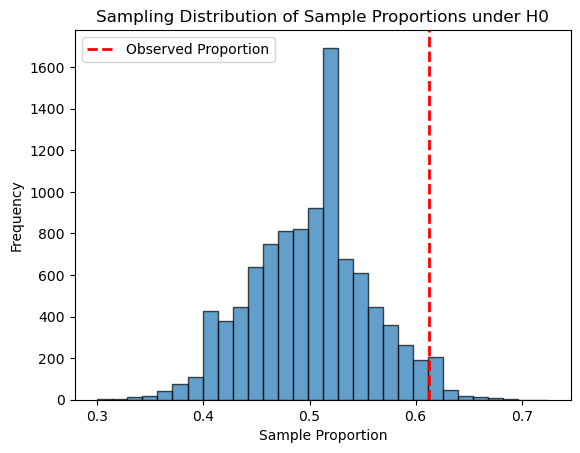

In [29]:
import numpy as np
import matplotlib.pyplot as plt

n_students = 80  # Original sample size
p_null = 0.5    # Proportion under the null hypothesis
n_simulations = 10000  # Number of simulations
observed_proportion = 49 / 80  # Observed sample proportion
np.random.seed(120)
# Simulate sample proportions under the null hypothesis
sample_proportions = np.random.binomial(n_students, p_null, n_simulations) / n_students

# Calculate the percentage of sample proportions as large or larger than the observed proportion
extreme_count = np.sum(sample_proportions >= observed_proportion) # Distinguishes our one-tailed test from a two-tailed test
percentage_extreme = (extreme_count / n_simulations) * 100

# Print the results
print(f"Observed Proportion: {observed_proportion:.4f}")
print(f"Number of sample proportions as large or larger than the observed proportion: {extreme_count}")
print(f"Percentage of Sample Proportions as or more extreme than {observed_proportion:.4f}: {percentage_extreme:.2f}%")

# Optional: Plot the sampling distribution
plt.hist(sample_proportions, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(observed_proportion, color='red', linestyle='dashed', linewidth=2, label='Observed Proportion')
plt.title('Sampling Distribution of Sample Proportions under H0')
plt.xlabel('Sample Proportion')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('sampling_distribution.png', dpi=300)
plt.show()

**_3. Findings and Discussion_**

We have determined that the p-value for the observed test statistic is 0.0291. Given the significance level of 0.05 set before the test and the table of p-values above, we reject the null hypothesis. There is moderate evidence against the claim that STA130 students are on average basing their answers about whether the tea or the milk came first through random guessing. In other words, we find it too unlikely at the 5% level of significance that the observed sample statistic happened purely by chance under the assumption set out by H0.

The data provides sufficiently significant evidence that students do have some ability to distinguish between cups of tea where the milk was poured first and cups where the tea was poured first. 

**ChatBot transcript log link:** https://chatgpt.com/share/670d4526-d900-8012-bfe8-b9caa586ac3c